In this post, we will explore Gibbs sampling, a [Markov chain Monte Caro](https://jaketae.github.io/study/MCMC/) algorithm used for sampling from probability distributions, somewhat similar to the [Metropolis-Hastings algorithm](https://jaketae.github.io/study/MCMC/#metropolis-hastings) we discussed some time ago. MCMC has somewhat of a special meaning to me because Markov chains was one of the first topics that I wrote about here on my blog.  

It's been a while since I have posted anything about math or statistics-related, and I'll admit that I've been taking a brief break from these domains, instead working on some personal projects and uping my Python coding skills. This post is going to be a fun, exciting mesh of some Python and math. Without further ado, let's get started.

# Gibbs Sampler

I remember struggling to understand Metropolis-Hastings a while back. Gibbs sampling, on the other hand, came somewhat very naturally and intuitively to me. This is not because I've suddenly grown intelligent over the past couple of months, but because Gibbs sampling is conceptually simpler, at least in my humble opinion. All that is necessary to understand Gibbs sampling is the notion of conditional probability distributions. 

## Problem Statement

We know the classic context in which MCMC comes into play in a Bayesian setting: there is some intractable distribution that we wish to sample from. Metropolis-Hastings was one simple way to go about this, and Gibbs sampling provides another method. 

A feature that makes Gibbs sampling unique is its restrictive context. In order to use Gibbs sampling, we need to have access to information regarding the conditional probabilities of the distribution we seek to sample from. In other words, say we want to sample from some joint probability distribution $n$ number of random variables. Let's denote this distribution as follows:

$$
p(x_1, x_2, x_3, \cdots, x_n)
$$

Turns out that the Gibbs sampler is a more specific version of the Metropolis-Hastings algorithm. We can ony use the Gibbs sampler in a restricted context: namely, that we have access to conditional probability distributions. 

$$
p(x_1 \vert x_2, x_3, \cdots, x_n) \\
p(x_2 \vert x_1, x_3, \cdots, x_n) \\
p(x_3 \vert x_1, x_2, \cdots, x_n) \\
\vdots \\
p(x_n \vert x_1, x_2, \cdots, x_{n - 1})
$$

You quickly see why the Gibbs sampler can only be used in limited contexts. Nonetheless, when these set of information are available, it is a powerful algorithm with which we can sample from intractable distributions. Let's see how this works. 

## Concept

The gist of the Gibbs sampler is simple: sample from known conditional distributions, and use that resulting value to sample the next random variable from the following conditional probability distribution, ad infinitum. But this is just a lot of words and some needless Latin for fun and flair, so let's hash out what the sentence really means. 

Continuing on from our generic example, let's say we sampled a value from the first conditional probability distribution. We will use a superscript and subscript notation to each denote the iteration and the sequence of random variable. Assume that we start from some random $n$-dimensional vector to start with. Following our notation, this vector would be

$$
(x_1^0, x_2^0, x_3^0, \cdots x_n^0)
$$

The superscripts are all 0 since this is the first "sample" we will start off with. Theoretically, it doesn't matter what these random numbers are---asymptotically speaking, we should still be abe to approximate the final distribution, especially if given the fact that we take burn-in into account.

On the first iteration, we will begin by sampling from the first probability distribution. 

$$
x_1^1 \sim p(x_1 \vert x_2^0, x_3^0, \cdots, x_n^0)
$$

Note that we simply used the initial random vaules for $x_2^0$ through $x_n^0$ to sample the first value from a conditional probability distribution. 

Now, we do the same to sample $x_2^1$. Only this time, we can use the result from earlier, namely $x_1^1$. We can see how this might help us yield a silghtly more convincing result than simply using the random data. 

$$
x_2^1 \sim p(x_2 \vert x_1^1, x_3^0, \cdots, x_n^0)
$$

We still have to use random values for $x_3$ through $x_n$ since we haven't sampled from their relevant conditional distributions just yet. However, as we go through all the random variables in order, it becomes obvious that we will no longer be using randomly initialized values at one point. Specifically, on the $k$th iteration, we would expect something like this to happen:

$$
x_m^k \sim p(x_m \vert x_1^k, x_2^k, \cdots, x_{m - 1}^k, x_{m + 1}^{k - 1}, \cdots, x_n^{k - 1})
$$

$m$ can be any number between 1 and $n$, since it is used to represent the $m$th random variable. 

As we repeat more iterations of sampling, we will eventually end up with a plausibel representation of $n$-dimensional vectors, which is what we sought to sample from the intractabe distribution!

## Python Implementation

In this section, we will take a look at a very simple example, namely sampling from a bivariate Gaussian distribution. Although we have dealt with $n$-dimensional examples in the algorithm analysis above, for the sake of demonstration, let's work on a simple example that we can also easily visualize and intuit. For this reason, the bivariate Gaussian distribution is a sensible choice. 

### Setup

For this post, I'll be usisng `seaborn`, which is a data visualization library built on top of `matplotlib`. I'll simply be using `seaborn` to display a bivariate Gaussian. For reproducability's sake, we will also set a random seed.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
np.random.seed(42)

### Algorithm

The code for the Gibbs sampler is simple, partially because the distribution we are dealing with is a bivariate Gaussian, not some high-dimensional intractable distribution. This point notwithstanding, the `gibbs_sampler` function shows the gist of how Gibbs sampling works. Here, we pass in parameters for the conditional distribution, and start sampling given an initial `y` value corresponding to $\mu_y$. As stated earlier, this random value can be chosen arbitrarily. Of course, if we start from a value that is way off, it will take much longer for the algorithm to converge, *i.e.* we will have to discard a large portion of initially sampled valuess. This is known as burn-in. In this case, however, we will apply a quick hack and start from a plausible value to begin with, reducing the need for burn-in. We then take turns samplilng from the conditional probability distributions using the sampled values, and apend to a list to accumulate the result.

In [2]:
def gibbs_sampler(mus, sigmas, n_iter=5000):
    samples = []
    y = mus[1]
    for _ in range(n_iter):
        x = p_x_given_y(y, mus, sigmas)
        y = p_y_given_x(x, mus, sigmas)
        samples.append([x, y])
    return samples

The more difficult part here is deriving the equation for the conditional probabiilty distributions of the bivariate Gaussian. The full result is available on [Wikipedia](https://en.wikipedia.org/wiki/Multivariate_normal_distribution#Conditional_distributions), but it's always more interesting and rewarding to derive these results ourselves. But in this section, we will assume that we already know the final result of the derivation and use the formula for now.

In [3]:
def p_x_given_y(y, mus, sigmas):
    mu = mus[0] + sigmas[1, 0] / sigmas[0, 0] * (y - mus[1])
    sigma = sigmas[0, 0] - sigmas[1, 0] / sigmas[1, 1] * sigmas[1, 0]
    return np.random.normal(mu, sigma)

def p_y_given_x(x, mus, sigmas):
    mu = mus[1] + sigmas[0, 1] / sigmas[1, 1] * (x - mus[0])
    sigma = sigmas[1, 1] - sigmas[0, 1] / sigmas[0, 0] * sigmas[0, 1]
    return np.random.normal(mu, sigma)

Note that the two functions are symmetrical, which is expected given that this is a bivariate distribution. These functions simulate a conditional distribution, where given a value of one random variable, we can sample the value of the other. This is the core mechanism by which we will be sampling from the joint probability distribution using the Gibbs sampling algorithm.

### Testing the Sampler

Let's initialize the parameters for the distribution and test the sampler.

In [5]:
mus = np.asarray([5, 5])
sigmas = np.asarray([[1, .9], [.9, 1]])

samples = gibbs_sampler(mus, sigmas); samples[:5]

[[5.094375689072134, 5.058667902942396],
 [5.175861934887288, 5.447651414116084],
 [5.358397131507042, 5.278071396535993],
 [5.550314691828798, 5.641095821184971],
 [5.487786105738833, 5.542093903446283]]

Great! This works as expected. For the purposes of demonstrating the implications of burn-in, let's define discard the first 100 values that were sampled. Below is the plot of the final resulting distribution based on sampled values using the Gibbs sampler. The result is what we would expect: a bivariate Gaussian.

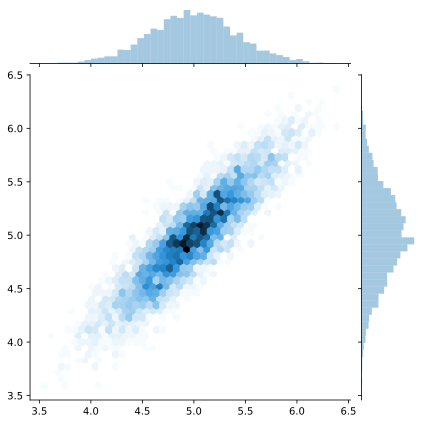

In [6]:
burn = 100
x, y = zip(*samples[burn:])
sns.jointplot(x, y, kind='hex')
plt.show()

And this is what we end up with if we sample directly from the bivariate Gaussian instead of using the Gibbs sampler. Note that we can do this only because we chose a deliberatey simple example; in many other contexts, this would certainly not be the case (if we could sample from a distribution directly, why use the Gibbs sampler in the first place?). Notice the similarity between the result achieved by sampling from the Gibbs sampler and the result produced from direct sampling as shown below.

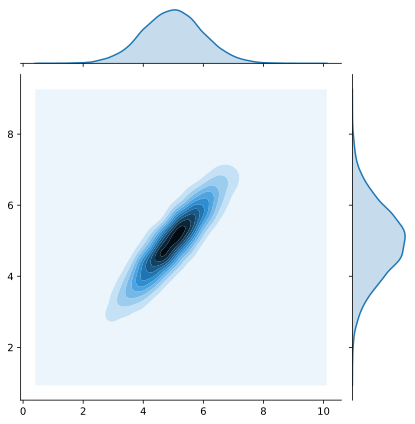

In [10]:
samples = np.random.multivariate_normal(mus, sigmas, 10000)

sns.jointplot(samples[:, 0], samples[:, 1], kind='kde')
plt.show()

So at this point, we have now empirically checked that Gibbs sampling indeed works: even if we can't directly sample from the distribution, if we have access to conditional distributions, we can still achieve an asymptotically similar result. 

Now comes the mathematics portion of deriving the conditional distribution of a multivariate Gaussian, as promised earlier.

# Conditionals of Multivariate Gaussians

In this section, we will derive an expression for the conditional distribution of the multivariate Gaussian. This isn't really relevant to the Gibbs sampling algorithm itself, since the sampler can be used in non-Gaussian contexts as long as we have access to conditional distributions. Nonetheless, deriving this is a good mental exercise that merits some discussion. 

## Definition

Just for the sake of quick review, let's briefly revisit the familiar definition of a conditional probability:

$$
p(x_1 \vert x_2, \cdots, x_n) = \frac{p(x_1, x_2, \cdots, x_n)}{p(x_2, x_3, \cdots, x_n)}
$$

In the context of random vectors, we can rewrite this as

$$
p(\mathbf{x} \vert \mathbf{y}) = \frac{p(\mathbf{x}, \mathbf{y})}{p(\mathbf{y})}
$$

Of course, if $\mathbf{x}$ and $\mathbf{y}$ are scalars, we go back to the familar bivariate context of our example.

In short, deriving the expression for the conditional distribution simply amounts to simplifying the fraction whose denominator is the marginal distribution and the numerator is the joint distribution. 

## Setup

Let's clarify the setup and notation first. We define a $n$-dimensional random vector that follows a multivariate Gaussian distribution, namely $\mathbf{x} \sim \mathcal{N}(\mu, \Sigma)$. This vector, denoted as $\mathbf{x}$, can be split into a $p$-dimensional vector $\mathbf{x_1}$ and $q$-dimensional vector $\mathbf{x_2}$ in the following fashion:

$$
\mathbf{x} = \begin{bmatrix} \mathbf{x_1} \\ \mathbf{x_2} \end{bmatrix} \tag{1}
$$

It is apparent that $p + q = n$. 

Similarly, we can split up the covariance matrix $\Sigma$ in the following fashion

$$
\Sigma = \begin{bmatrix} \Sigma_{11} & \Sigma_{12} \\ \Sigma_{21} & \Sigma_{22} \end{bmatrix} \tag{2}
$$

where $\Sigma_{11} \in \mathbb{R}^{p \times p}$, $\Sigma_{22} \in \mathbb{R}^{q \times q}$, $\Sigma_{12} \in \mathbb{R}^{p \times q}$. Also, given the symmetric property of the covariance matrix, $\Sigma_{21}^\top = \Sigma_{12}$. 


The goal is to derive is the conditional distribution, $p(\mathbf{x_2} \vert \mathbf{x_1})$.  

## Derivation

This derivation was heavily adapted from [this source](http://fourier.eng.hmc.edu/e161/lectures/gaussianprocess/node7.html) and [this thread](https://stats.stackexchange.com/questions/30588/deriving-the-conditional-distributions-of-a-multivariate-normal-distribution) on Stack Exchange. It is certainly a somewhat lengthy derivation, but there is nothing too conceptually difficult involved---it's just a lot of algebra and simplifications. 

We begin from the formula for the multivariate Gaussian:

$$
p(\mathbf{x}) = p(\mathbf{x_1}, \mathbf{x_2}) = \frac{1}{\sqrt{(2 \pi)^n \vert \Sigma \vert}}\text{exp}\left(- \frac12 (\mathbf{x} - \mu)^\top \Sigma^{-1} (\mathbf{x} - \mu) \right) \tag{3}
$$

For convenience purposes, let 

$$
Q(\mathbf{x_1}, \mathbf{x_2}) = (\mathbf{x} - \mu)^\top \Sigma^{-1} (\mathbf{x} - \mu) \tag{4}
$$

Then, 

$$
\begin{align}
Q(\mathbf{x_1}, \mathbf{x_2}) 
&= (\mathbf{x} - \mu)^\top \Sigma^{-1} (\mathbf{x} - \mu) \\
&= \left [(\mathbf{x_1} - \mu_1)^\top, (\mathbf{x_2} - \mu_2)^\top \right] \begin{bmatrix} \Sigma_{11} & \Sigma_{12} \\ \Sigma_{21} & \Sigma_{22} \end{bmatrix}^{-1} \begin{bmatrix} (\mathbf{x_1} - \mu_1) \\ (\mathbf{x_2} - \mu_2) \end{bmatrix} \\
\end{align} \tag{5}
$$

Let

$$
\begin{bmatrix} \Sigma_{11} & \Sigma_{12} \\ \Sigma_{21} & \Sigma_{22} \end{bmatrix}^{-1} = \begin{bmatrix} \Sigma^{11} & \Sigma^{12} \\ \Sigma^{21} & \Sigma^{22} \end{bmatrix} \tag{6}
$$

Note that this is not a one-to-one correspondence, *i.e.* $\Sigma_{11}^{-1} \neq \Sigma^{11}$. The blocks are only one-to-one insofar as being dimensionally equivalent.

Then, using block matrix multiplication,

$$
Q(\mathbf{x_1}, \mathbf{x_2}) \\
= \left[ (\mathbf{x_1} - \mu_1)^\top \Sigma^{11} + (\mathbf{x_2} - \mu_2)^\top \Sigma^{21}, (\mathbf{x_1} - \mu_1)^\top \Sigma^{12} + (\mathbf{x_2} - \mu_2)^\top \Sigma^{22} \right] \begin{bmatrix} (\mathbf{x_1} - \mu_1) \\ (\mathbf{x_2} - \mu_2) \end{bmatrix} \\
= (\mathbf{x_1} - \mu_1)^\top \Sigma^{11} (\mathbf{x_1} - \mu_1) + (\mathbf{x_2} - \mu_2)^\top \Sigma^{21} (\mathbf{x_1} - \mu_1) + (\mathbf{x_1} - \mu_1)^\top \Sigma^{12} (\mathbf{x_2} - \mu_2) + (\mathbf{x_2} - \mu_2)^\top \Sigma^{22} (\mathbf{x_2} - \mu_2) \tag{7}
$$

Notice that the final result should be a single scalar given the dimensions of each matrix. Therefore, we can further simply the expression above using the fact that $\left(\Sigma^{11}\right)^\top = \Sigma^{12}$. Specifically, the second and third terms are transposes of each other.

$$
Q(\mathbf{x_1}, \mathbf{x_2}) \\
= (\mathbf{x_1} - \mu_1)^\top \Sigma^{11} (\mathbf{x_1} - \mu_1) + 2(\mathbf{x_1} - \mu_1)^\top \Sigma^{12} (\mathbf{x_2} - \mu_2) + (\mathbf{x_2} - \mu_2)^\top \Sigma^{22} (\mathbf{x_2} - \mu_2) \tag{8}
$$

Although we simply resorted a convenient substitution in (6), we still need to derive an expression for the inverse of the covariance matrix. Note that the inverse of the covariance matrix can intuitively be understood as the precision matrix. 

We won't derive the block matrix inversion formula here. The derivation is just a matter of simply plugging in and substituting one expression for another. For a detailed full derivation, checkout [this link](http://fourier.eng.hmc.edu/e161/lectures/gaussianprocess/node7.html) or this [journal article](http://msvlab.hre.ntou.edu.tw/grades/now/inte/Inverse%20&%20Border/border-LuTT.pdf). To cut to the chase, we end up with

$$
\Sigma^{11} = \Sigma_{11}^{-1} + \Sigma_{11}^{-1} \Sigma_{12} \left(\Sigma_{22} - \Sigma_{12}^\top \Sigma_{11}^{-1} \Sigma_{12} \right)^{-1} \Sigma_{12}^\top \Sigma_{11}^{-1} \\
\Sigma^{22} = \Sigma_{22}^{-1} + \Sigma_{22}^{-1} \Sigma_{12}^\top \left(\Sigma_{11} - \Sigma_{12} \Sigma_{22}^{-1} \Sigma_{12}^\top \right)^{-1} \Sigma_{12} \Sigma_{22}^{-1} \\
\Sigma^{12} = - \Sigma_{11}^{-1} \Sigma_{12} \left( \Sigma_{22} - \Sigma_{12}^\top \Sigma_{11}^{-1} \Sigma_{12} \right)^{-1} = \left (\Sigma^{21} \right)^\top
$$

Plugging these results back into (8), and with some elided simplification steps, we end up with

$$
Q(\mathbf{x_1}, \mathbf{x_2}) \\
= (\mathbf{x_1} \mu_1)^\top \Sigma_{11}^{-1} (\mathbf{x_1} - \mu_1) \\
+ \left[ \mathbf{x_2} - \mu_2 - \Sigma_{12}^\top \Sigma_{11}^{-1} (\mathbf{x_1} - \mu_1) \right]^\top \left(\Sigma_{22} - \Sigma_{12}^\top \Sigma_{11}^{-1} \Sigma_{12} \right)^{-1} \left[ \mathbf{x_2} - \mu_2 - \Sigma_{12}^\top \Sigma_{11}^{-1} (\mathbf{x_1} - \mu_1) \right]
$$

Note that we can more conveniently express the result in the following fashion:

$$
Q(\mathbf{x_1}, \mathbf{x_2}) = Q_1(\mathbf{x_1}) + Q_2(\mathbf{x_1}, \mathbf{x_2})
$$

We're now almost done. Heuristically, we know that the addition in $Q(\mathbf{x_1}, \mathbf{x_2})$ will become a multiplication when plugged back into the original formula for the multivariate Gaussian as shown in (3), using (4). Therefore, if we divide the entire expression by $p(\mathbf{x_1})$, we will only end up with the term produced by $Q_2(\mathbf{x_1}, \mathbf{x_2})$. Using this heuristic, we conclude that 

$$
\mathbf{x_2 \vert x_1} \sim \mathcal{N} \left(\mu_2 - \Sigma_{12}^\top \Sigma_{11}^{-1} (\mathbf{x_1} - \mu_1), \Sigma_{22} - \Sigma_{12}^\top \Sigma_{11}^{-1} \Sigma_{12} \right)
$$

Notice that this result is exactly what we have in the funtion which we used to sample from the conditional distribution. 

In [ ]:
def p_y_given_x(x, mus, sigmas):
    mu = mus[1] + sigmas[0, 1] / sigmas[1, 1] * (x - mus[0])
    sigma = sigmas[1, 1] - sigmas[0, 1] / sigmas[0, 0] * sigmas[0, 1]
    return np.random.normal(mu, sigma)

# Conclusion

The Gibbs sampler is another very interesting algorithm we can use to sample from complicated, intractable distributions. Although the use case of the Gibbs sampler is somewhat limited due to the fact that we need to be able to access the conditional distribution, it is a powerful algorithm nonetheless. 

We also discussed the notion of conditional distributions of the multivariate Gaussian in this post. The derivation was not the simplest, and granted we omitted a lot of algebra along the way, but it was a good mental exercise nonetheless. If you are interested in a simpler proof, I highly recommend that you check out the Stack Exchange post I linked above. 

I hope you enjoyed reading this post. Catch you up in the next one!